In [ ]:
!pip install fredapi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import time


plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 300)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
fred_key = 'api_key'
fred = Fred(api_key=fred_key)

In [5]:
unrate = fred.get_series('UNRATE')

In [21]:
unemploy_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [22]:
unemploy_df = unemploy_df.query('seasonal_adjustment == "Seasonally Adjusted" \
    and units == "Percent"')

unemploy_df = unemploy_df.loc[unemploy_df['title'].str.contains('Unemployment Rate')]

In [23]:
all_results = []

for id in unemploy_df.index:
  results = fred.get_series(id)
  results = results.to_frame(name=id)
  all_results.append(results)
  time.sleep(0.2)

  
unemploy_result = pd.concat(all_results, axis=1)

In [24]:
drop_cols = []
for i in unemploy_result:
  if len(i) > 4:
    drop_cols.append(i)

In [25]:
unemploy_result = unemploy_result.drop(columns=drop_cols, axis=1)
unemploy_result

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,NCUR,PAUR,ALUR,MNUR,MOUR,NJUR,WIUR,TNUR,GAUR,ILUR,KYUR,VAUR,COUR,AZUR,WAUR,WVUR,MAUR,ARUR,OKUR,NVUR,ORUR,INUR,IAUR,SCUR,NMUR,LAUR,MDUR,NDUR,HIUR,UTUR,DCUR,NEUR,MTUR,KSUR,MSUR,IDUR,SDUR,AKUR,PRUR,NHUR,WYUR,MEUR,CTUR,RIUR,VTUR,DEUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,3.8,2.5,4.0,4.3,4.0,4.1,3.6,4.1,2.6,2.0,2.4,3.3,3.2,3.4,2.8,4.5,3.8,2.6,3.4,3.7,3.7,4.0,3.4,3.5,3.2,4.4,3.8,2.8,2.7,3.2,4.2,3.4,4.0,2.2,3.5,2.1,4.7,2.2,2.9,2.6,3.6,2.8,2.3,4.4,NaN,2.2,3.3,3.3,4.0,3.1,2.1,4.3
2022-10-01,4.0,2.7,4.0,4.3,4.2,4.2,3.8,4.0,2.7,2.1,2.6,3.4,3.3,3.5,2.9,4.6,3.9,2.7,3.6,3.9,3.8,4.0,3.5,3.6,3.4,4.6,4.1,3.0,2.9,3.3,4.3,3.3,4.5,2.3,3.3,2.1,4.8,2.4,3.0,2.8,3.8,2.9,2.4,4.5,NaN,2.4,3.5,3.6,4.3,3.4,2.3,4.3
2022-11-01,4.1,2.6,4.0,4.3,4.2,4.3,3.9,4.0,2.7,2.3,2.7,3.4,3.3,3.5,3.0,4.7,4.0,2.8,3.5,4.1,4.0,4.1,3.4,3.7,3.4,4.9,4.3,3.0,3.1,3.3,4.1,3.3,4.3,2.3,3.3,2.2,4.6,2.5,2.9,2.8,3.9,3.0,2.4,4.5,NaN,2.6,3.6,3.7,4.2,3.6,2.5,4.4
2022-12-01,4.1,2.5,3.9,4.3,4.2,4.3,3.9,3.9,2.8,2.5,2.8,3.4,3.2,3.5,3.0,4.7,4.0,3.0,3.3,4.0,4.2,4.1,3.3,3.6,3.4,5.2,4.5,3.1,3.1,3.3,3.9,3.5,4.0,2.3,3.2,2.2,4.7,2.6,2.8,2.9,4.0,2.9,2.3,4.3,NaN,2.7,3.7,3.8,4.2,3.5,2.6,4.4


In [26]:
unemploy_states = unemploy_result.copy()
unemploy_states = unemploy_states.dropna()
id_to_state = unemploy_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemploy_states.columns = [id_to_state[c] for c in unemploy_states.columns]

unemploy_states = unemploy_states.drop(columns=['Puerto Rico'], axis=1) 
unemploy_states = unemploy_states.rename(columns={'the District of Columbia':'District Of Columbia'})

In [27]:
px.line(unemploy_states)

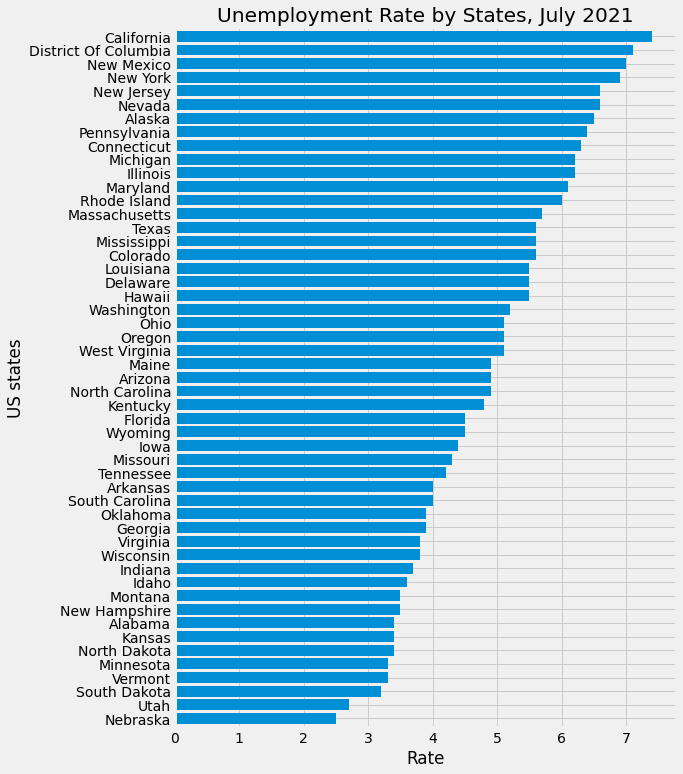

In [30]:
ax = unemploy_states.loc[unemploy_states.index == '2021-07-01'].T.sort_values('2021-07-01')\
            .plot(kind='barh', figsize=(8, 12), width=0.8, title='Unemployment Rate by States, July 2021')

ax.legend().remove()
ax.set_xlabel('Rate')
ax.set_ylabel('US states')
plt.show()

In [31]:
employed_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))

employed_df = employed_df.query('seasonal_adjustment == "Seasonally Adjusted" \
    and units == "Percent"')

In [32]:
part_id_to_state = employed_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()

all_results = []

for id in employed_df.index:
  results = fred.get_series(id)
  results = results.to_frame(name=id)
  all_results.append(results)
  time.sleep(0.2)

In [33]:
employed_states = pd.concat(all_results, axis=1)
employed_states.columns = [part_id_to_state[c] for c in employed_states.columns]

In [34]:
drop_cols = []
for i in employed_states:
  if len(i.split(' ')) > 4:
    drop_cols.append(i)


employed_states = employed_states.drop(columns=drop_cols, axis=1)
employed_states = employed_states.drop(columns=['Labor Force Participation Rate'], axis=1)

In [35]:
employed_states.columns = employed_states.columns.str.strip()

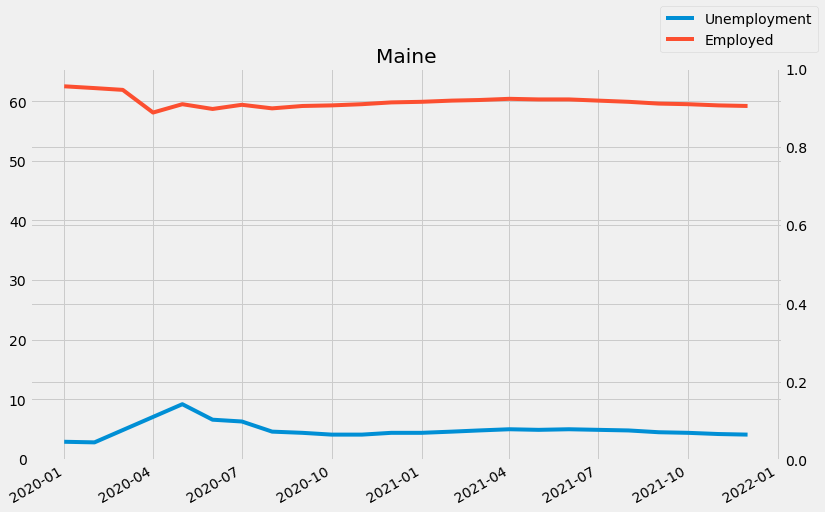

In [39]:
state = 'Maine'

fig, ax = plt.subplots(figsize=(12, 8), sharex=True)
ax2 = ax.twinx()

unemploy_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax, label='Unemployment')
employed_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax, label='Employed')


ax.set_title(state)
fig.legend(labels=['Unemployment','Employed'])
plt.show()